# Homework 6: A Systematic Homework on Randomness

Physics 177, Spring 2017 (Prof. Tanedo)  
Revised: Monday, May 15th  
Due: Tuesday, May 23    

*Your Name*


## Problem 1: Drunkard's Walk in One Dimension
This problem is motivated by Chapter 7 of *Computational Physics, Second Edition* by N. Giordano and H. Nakanishi.


*Insert your favorite joke about the Thursday night wine and music events.*

The drunkard's walk problem is an example of a **stochastic** system (randomness plays a key role). A drunkard walks randomly in one dimension, as defined by the following rule:

* At each time step, the drunkard randomly picks a direction (forward or backward) and takes one step in that direction.

In this problem, will use Python's `random` library to code the drunkard's walk in an array. You then relate this problem to diffusion in a physical system.

### Problem 1a

Code the drunkard's walk for `nSteps=1000` steps. Assume the drunkard starts at the original The result of your code should be an array of positions. It is also useful to keep an array of squared positions, $x^2$. 

Plot the drunkard's walk ($x$ as a function of step number) and the squared displacement ($x^2$ as a function of step number) for a given random seed.

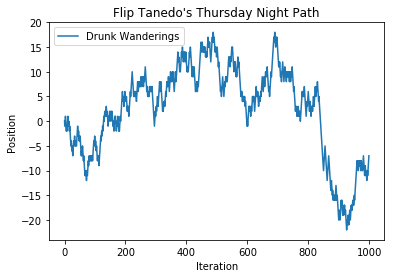

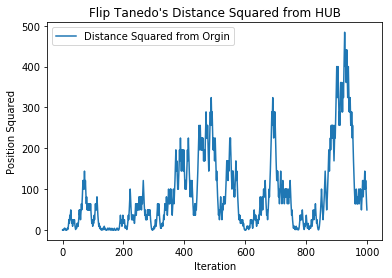

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from random import random
from random import randint

trajectory = [0]
nSteps = 1000
step = 0
a = 0
b = 0

while step < nSteps - 1:
    a = randint(0,1)
    if a == 0:
        trajectory.append(trajectory[b] - 1)
    if a == 1:
        trajectory.append(trajectory[b] + 1)
    step += 1
    b += 1
    
tpoints = np.arange(0, 1000, 1)
tt = np.array(tpoints)

path = np.array(trajectory)

displacement_sq = path**2

plt.plot(tt, path, label='Drunk Wanderings')
plt.title("Flip Tanedo\'s Thursday Night Path")
plt.xlabel('Iteration')
plt.ylabel('Position')
plt.legend()
plt.show()

plt.plot(tt, displacement_sq, label='Distance Squared from Orgin')
plt.title("Flip Tanedo\'s Distance Squared from HUB")
plt.xlabel('Iteration')
plt.ylabel('Position Squared')
plt.legend()
plt.show()

### Problem 1b

A more useful quantity is to examine the *average* of $x^2$ over many drunkards. For our purposes, pick `nWalkers=100`. Your code should output:  

$\langle x^2 \rangle = \frac{1}{n_\text{Walkers}} \sum_{i} x_i^2$  

where the sum over $i$ is a sum over the 100 walkers.

The resulting plot should look much better behaved. In fact, it should fit to

$\langle x^2 \rangle = 2 D t$,

where $D$ is the diffusion constant. What is the value of $D$ based on your plot?

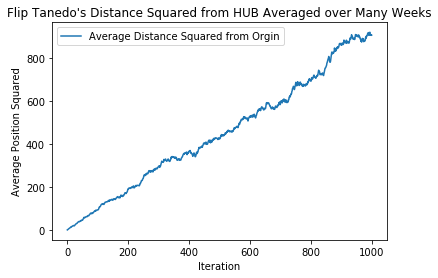

F:\AnacondaandPython\lib\site-packages\ipykernel\__main__.py:41: RuntimeWarning: invalid value encountered in true_divide


In [3]:
nWalkers = 100
nSteps = 1000
i = 0

step = 0
a = 0
z = 0
trajectory = [0]

summed_displacement_sq = np.zeros(1000)


while i < nWalkers - 1:
    z = 0
    step = 0
    trajectory = [0]
    while step < nSteps - 1:
        a = randint(0,1)
        if a == 0:
            trajectory.append(trajectory[z] - 1)
        if a == 1:
            trajectory.append(trajectory[z] + 1)
        step += 1
        z += 1
        
    path = np.array(trajectory)
    displacement_sq = path**2
    
    summed_displacement_sq += displacement_sq
    i += 1
    
avg_displacement_sq = summed_displacement_sq / nWalkers

plt.plot(tt, avg_displacement_sq, label='Average Distance Squared from Orgin')
plt.title("Flip Tanedo\'s Distance Squared from HUB Averaged over Many Weeks")
plt.xlabel('Iteration')
plt.ylabel('Average Position Squared')
plt.legend()
plt.show()

diffusion_constant = avg_displacement_sq / (2 * tt)

## Diffusion Constant
The Diffusion Constant seems to be right around .5

I shall print it below.

### Problem 1c

Do the same thing for a drunkard's walk in three dimensions. Define the position of the particle to be a `numpy` array with three components. It may be helpful to define `numpy` arrays with the possible directions one can traverse.

Store these directions in a list, `directions`.  A random step then corresponds to a shift by `sample(directions,1)[0]`. (Test this.)

What is the value of $D$ for the 3D drunkard's walk?

## Displacement Squared + Trajectory

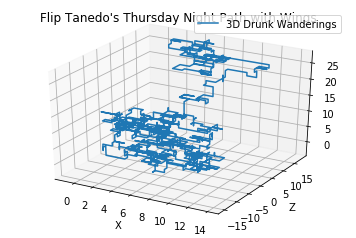

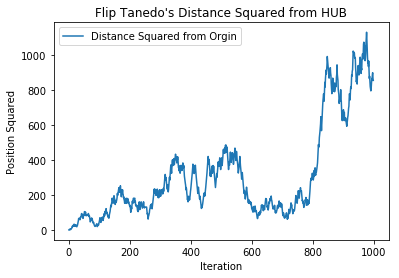

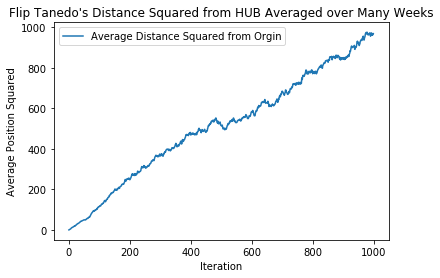

F:\AnacondaandPython\lib\site-packages\ipykernel\__main__.py:135: RuntimeWarning: invalid value encountered in true_divide


In [5]:
from mpl_toolkits.mplot3d import Axes3D
trajectory_x = [0]
trajectory_y = [0]
trajectory_z = [0]
nSteps = 1000
step = 0
a = 0
b = 0

while step < nSteps - 1:
    a = randint(0,5)
    if a == 0:
        trajectory_x.append(trajectory_x[b] - 1)
        trajectory_y.append(trajectory_y[b])
        trajectory_z.append(trajectory_z[b])
    if a == 1:
        trajectory_x.append(trajectory_x[b] + 1)
        trajectory_y.append(trajectory_y[b])
        trajectory_z.append(trajectory_z[b])
    if a == 2:
        trajectory_x.append(trajectory_x[b])
        trajectory_y.append(trajectory_y[b] + 1)
        trajectory_z.append(trajectory_z[b])
    if a == 3:
        trajectory_x.append(trajectory_x[b])
        trajectory_y.append(trajectory_y[b] - 1)
        trajectory_z.append(trajectory_z[b])
    if a == 4:
        trajectory_x.append(trajectory_x[b])
        trajectory_y.append(trajectory_y[b])
        trajectory_z.append(trajectory_z[b] + 1)
    if a == 5:
        trajectory_x.append(trajectory_x[b])
        trajectory_y.append(trajectory_y[b])
        trajectory_z.append(trajectory_z[b] - 1)
    step += 1
    b += 1
    
tpoints = np.arange(0, 1000, 1)
tt = np.array(tpoints)


path_x = np.array(trajectory_x)
path_y = np.array(trajectory_y)
path_z = np.array(trajectory_z)

displacement_sq_r = path_x**2 + path_y**2 + path_z**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(path_x, path_y, path_z, label='3D Drunk Wanderings')
ax.set_title("Flip Tanedo\'s Thursday Night Path with Wings")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_ylabel('Z')
plt.legend()
plt.show()

plt.plot(tt, displacement_sq_r, label='Distance Squared from Orgin')
plt.title("Flip Tanedo\'s Distance Squared from HUB")
plt.xlabel('Iteration')
plt.ylabel('Position Squared')
plt.legend()
plt.show()


nWalkers = 100
nSteps = 1000
i = 0
step = 0
a = 0
b = 0
trajectory = [0]
summed_displacement_sq = np.zeros(1000)


while i < nWalkers - 1:
    b = 0
    step = 0
    trajectory = [0]
    trajectory_x = [0]
    trajectory_y = [0]
    trajectory_z = [0]
    while step < nSteps - 1:
        a = randint(0,1)
        if a == 0:
            trajectory_x.append(trajectory_x[b] - 1)
            trajectory_y.append(trajectory_y[b])
            trajectory_z.append(trajectory_z[b])
        if a == 1:
            trajectory_x.append(trajectory_x[b] + 1)
            trajectory_y.append(trajectory_y[b])
            trajectory_z.append(trajectory_z[b])
        if a == 2:
            trajectory_x.append(trajectory_x[b])
            trajectory_y.append(trajectory_y[b] + 1)
            trajectory_z.append(trajectory_z[b])
        if a == 3:
            trajectory_x.append(trajectory_x[b])
            trajectory_y.append(trajectory_y[b] - 1)
            trajectory_z.append(trajectory_z[b])
        if a == 4:
            trajectory_x.append(trajectory_x[b])
            trajectory_y.append(trajectory_y[b])
            trajectory_z.append(trajectory_z[b] + 1)
        if a == 5:
            trajectory_x.append(trajectory_x[b])
            trajectory_y.append(trajectory_y[b])
            trajectory_z.append(trajectory_z[b] - 1)
        step += 1
        b += 1
        
    pathx = np.array(trajectory_x)
    displacement_sq_x = pathx**2
    
    pathy = np.array(trajectory_y)
    displacement_sq_y = pathy**2
    
    pathz = np.array(trajectory_z)
    displacement_sq_z = pathz**2
    
    summed_displacement_sq += displacement_sq_x + displacement_sq_y + displacement_sq_z
    i += 1
    
avg_displacement_sq = summed_displacement_sq / nWalkers

plt.plot(tt, avg_displacement_sq, label='Average Distance Squared from Orgin')
plt.title("Flip Tanedo\'s Distance Squared from HUB Averaged over Many Weeks")
plt.xlabel('Iteration')
plt.ylabel('Average Position Squared')
plt.legend()
plt.show()

diffusion_constant = avg_displacement_sq / (2 * tt)

## Diffusion Constant

This one is clearly right about the same as in the 1d case.

### Problem 1.x (extra credit)

*This problem has no programming, I suggest working it out on paper and then sketching the proof here, with key steps written out explicitly*

Derive the diffusion equation from the discretized drunkard's walk. For simplicity, work in two dimensions. Let $P(i,j,t)$ be the probability of finding the drunkard at site $(i,j)$ and time $t$. You want to show:

$\displaystyle \frac{\partial P(x,y,t)}{\partial t} = D \nabla^2 P(x,y,t)$

The key to this is the insight that the probability that the drunkard is at position $(i,j)$ at time $t$ is given by the equally weighted average of the probabilities that the drunkard was at one of the adjacent positions. 

Use this insight to re-write $P(i,j,t) - P(i,j,t-1)$ as a sum of terms that reproduces the Laplacian. You remember what the discretized Laplacian looks like, right?

## Problem 2: Brownian Motion

Let's use the 2D drunkard's walk to model Brownian motion. 

### Problem 2a

Imagine a 2D box of length `L=101`. Place a "drunkard" in the middle of the grid. The drunkard moves in one step in any direction (north, east, south, west) each step. If the drunk hits the wall, forbit motion that goes outside of the box. 

Animate the position of the drunkard as a funtion of time for some period of time.

### Problem 2b

Same as problem 2a, but now populate the center of the box with 20 drunkards that each move randomly. For this problem, allow the drunkards to "stack" on top of each other if they overlap.

### Problem 2x (extra credit)

Semi-self-avoiding drunkards. Same as problem 2b, but now prohibit any motion that would cause drunkards to overlap with each other. You'll have to come up with some appropriate initial condition where the drunkards all start close to each other in the center of the box. There may be conditions where a drunkard cannot move.

## 2A
note: only partially working animation, but data is all good.

<IPython.core.display.Javascript object>


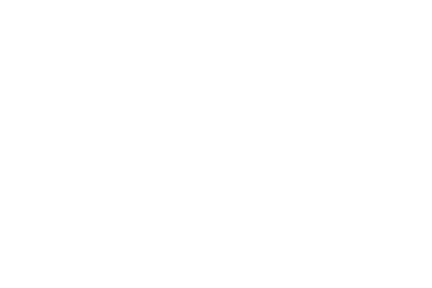

<IPython.core.display.Javascript object>


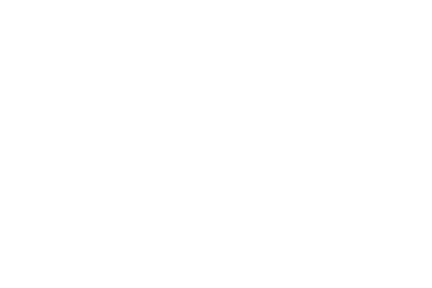

In [7]:
%matplotlib notebook

from matplotlib import animation, rc
from IPython.display import HTML

#Starting at Box Center
trajectory_x = [51]
trajectory_y = [51]
nSteps = 1000
step = 0
a = 0
b = 0

while step < nSteps - 1:
    a = randint(0,3)
    if a == 0 and trajectory_x[b] != 0:
        trajectory_x.append(trajectory_x[b] - 1)
        trajectory_y.append(trajectory_y[b])
    if a == 0 and trajectory_x[b] == 0:
        trajectory_x.append(trajectory_x[b])
        trajectory_y.append(trajectory_y[b])
    if a == 1 and trajectory_x[b] != 101:
        trajectory_x.append(trajectory_x[b] + 1)
        trajectory_y.append(trajectory_y[b])
    if a == 1 and trajectory_x[b] == 101:
        trajectory_x.append(trajectory_x[b])
        trajectory_y.append(trajectory_y[b])
    if a == 2 and trajectory_y[b] != 0:
        trajectory_x.append(trajectory_x[b])
        trajectory_y.append(trajectory_y[b] - 1)
    if a == 2 and trajectory_y[b] == 0:
        trajectory_x.append(trajectory_x[b])
        trajectory_y.append(trajectory_y[b])
    if a == 3 and trajectory_y[b] != 101:
        trajectory_x.append(trajectory_x[b])
        trajectory_y.append(trajectory_y[b] + 1)
    if a == 3 and trajectory_y[b] == 101:
        trajectory_x.append(trajectory_x[b])
        trajectory_y.append(trajectory_y[b])
    step += 1
    b += 1
    
tpoints = np.arange(0, 1000, 1)
tt = np.array(tpoints)


path_x = np.array(trajectory_x)
path_y = np.array(trajectory_y)

fig, ax = plt.subplots()

ax.set_xlim((-2,103))
ax.set_ylim((-2,103))

line, = ax.plot([],[], lw=2)

def init():
    line.set_data([],[])
    return (line,)

def animate(i):
    x = path_x
    y = path_y[i]
    line.set_data(x,y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20,  blit=True)
plt.show()
#HTML(anim.to_html5_video())

## 2B
note: animation not working, but data is all good

<IPython.core.display.Javascript object>


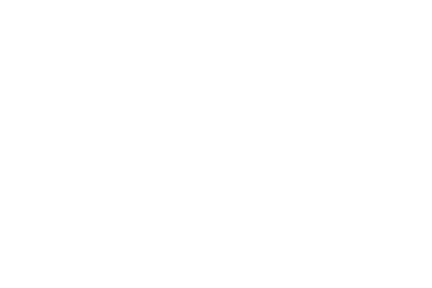

<IPython.core.display.Javascript object>


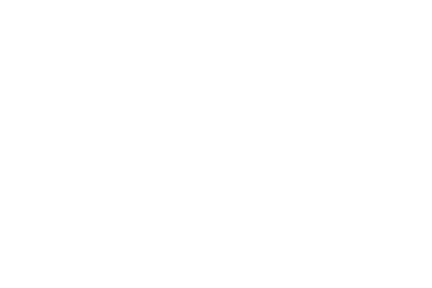

In [8]:
#Starting at Box Center
def pathfinder():
    a = 0
    b = 0
    trajectory_x = [51]
    trajectory_y = [51]
    nSteps = 1000
    step = 0
    while step < nSteps - 1:
        a = randint(0,3)
        if a == 0 and trajectory_x[b] != 0:
            trajectory_x.append(trajectory_x[b] - 1)
            trajectory_y.append(trajectory_y[b])
        if a == 0 and trajectory_x[b] == 0:
            trajectory_x.append(trajectory_x[b])
            trajectory_y.append(trajectory_y[b])
        if a == 1 and trajectory_x[b] != 101:
            trajectory_x.append(trajectory_x[b] + 1)
            trajectory_y.append(trajectory_y[b])
        if a == 1 and trajectory_x[b] == 101:
            trajectory_x.append(trajectory_x[b])
            trajectory_y.append(trajectory_y[b])
        if a == 2 and trajectory_y[b] != 0:
            trajectory_x.append(trajectory_x[b])
            trajectory_y.append(trajectory_y[b] - 1)
        if a == 2 and trajectory_y[b] == 0:
            trajectory_x.append(trajectory_x[b])
            trajectory_y.append(trajectory_y[b])
        if a == 3 and trajectory_y[b] != 101:
            trajectory_x.append(trajectory_x[b])
            trajectory_y.append(trajectory_y[b] + 1)
        if a == 3 and trajectory_y[b] == 101:
            trajectory_x.append(trajectory_x[b])
            trajectory_y.append(trajectory_y[b])
        step += 1
        b += 1
            
    path_x = np.array(trajectory_x)
    path_y = np.array(trajectory_y)
    return(path_x, path_y)

pathx1, pathy1 = pathfinder()
pathx2, pathy2 = pathfinder()
pathx3, pathy3 = pathfinder()
pathx4, pathy4 = pathfinder()
pathx5, pathy5 = pathfinder()
pathx6, pathy6 = pathfinder()
pathx7, pathy7 = pathfinder()
pathx8, pathy8 = pathfinder()
pathx9, pathy9 = pathfinder()
pathx10, pathy10 = pathfinder()
pathx11, pathy11 = pathfinder()
pathx12, pathy12 = pathfinder()
pathx13, pathy13 = pathfinder()
pathx14, pathy14 = pathfinder()
pathx15, pathy15 = pathfinder()
pathx16, pathy16 = pathfinder()
pathx17, pathy17 = pathfinder()
pathx18, pathy18 = pathfinder()
pathx19, pathy19 = pathfinder()
pathx20, pathy20 = pathfinder()

fig = plt.figure()

ax1 = plt.axes(xlim=(-2, 103), ylim=(-2, 103))
line, = ax1.plot([], [], lw=2)
plt.xlabel('X')
plt.ylabel('Y')

N = 20

#lines = [plt.plot([], [])][0] for _ in range(N)
lines = []

def init():
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    xlist = [pathx1, pathx2, pathx3, pathx4, pathx5, pathx6, pathx7, pathx8, pathx9, pathx10, pathx11, pathx12, pathx13, pathx14, pathx15, pathx16, pathx17, pathx18, pathx19, pathx20]
    ylist = [pathy1, pathy2, pathy3, pathy4, pathy5, pathy6, pathy7, pathy8, pathy9, pathy10, pathy11, pathy12, pathy13, pathy14, pathy15, pathy16, pathy17, pathy18, pathy19, pathy20]
    
    for lnum, line in enumerate(lines):
        line.set_data(xlist[lnum], ylist[lnum])
    return lines

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True)

plt.show()
    

## Problem 3: Hyperspheres and Monte Carlo

Calculate the volume of a unit $n$-sphere for the cases $n$ = 2,3,4,5,6. Use the **Monte Carlo** "throwing marbles" method where you randomly sample points in an $n$-dimensional unit cube and keep track of how many points fall within the condition

$\sum_i^n x_i^2 < 1$.

Compare to the analytic formulae here: https://en.wikipedia.org/wiki/Volume_of_an_n-ball

### Problem 3x

Plot the estimated hypervolume as a function of number of random samples used, and plot (as a horizontal line) the correct values from the analytic formula. Alternatively, plot the "difference from the true result" as a function of number of samples. 

Comment on how the number of samples required depends on the dimensionality of the hypersphere.

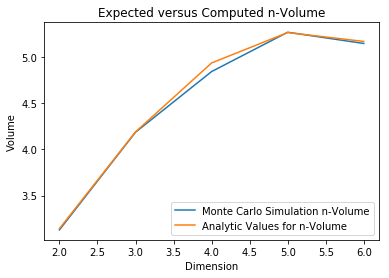

In [15]:
from math import pi
%matplotlib inline

def NVolume(N, nSample):
    count = 0
    i = 0
    for i in range(nSample):
        j = 0
        qs = 0
        for j in range(N):
            q = random()
            qs += q**2
        if qs < 1:
            count += 1
    return 2**N * count / nSample
      
functionvolvol = [NVolume(2, 10000), NVolume(3, 10000), NVolume(4, 10000), NVolume(5, 10000), NVolume(6, 10000)]
graphvol = np.array(avol)

realvol = [pi, (4.0/ 3.0) * pi, pi**2 / 2.0, (8.0 / 15.0) * pi**2, pi**3 / 6.0]
graphrealvol = np.array(realvol)

nums = [2, 3, 4, 5 , 6]
npnums = np.array(nums)

plt.plot(npnums, graphvol, label='Monte Carlo Simulation n-Volume')
plt.plot(npnums, graphrealvol, label='Analytic Values for n-Volume')
plt.title("Expected versus Computed n-Volume")
plt.xlabel('Dimension')
plt.ylabel('Volume')
plt.legend()
plt.show()

## Comment on n-Volume

The Monte Carlo simulation worked decently for all of the values.

Mind you this is with 10000 samples, so it's not being cut on too much computing time.